In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/archive (69)/Loan.csv")
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [ ]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [ ]:
df.tail()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0
19999,2072-10-03,20,53227,574,Employed,Associate,0,32055,48,Married,...,4435.583333,0.853801,5,41372,0.240055,0.242693,1049.830407,0.298006,0,59.0


In [ ]:
df.isna().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


In [ ]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [ ]:
df.dtypes

,0
ApplicationDate,object
Age,int64
AnnualIncome,int64
CreditScore,int64
EmploymentStatus,object
EducationLevel,object
Experience,int64
LoanAmount,int64
LoanDuration,int64
MaritalStatus,object


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop("ApplicationDate",axis=1,inplace=True)

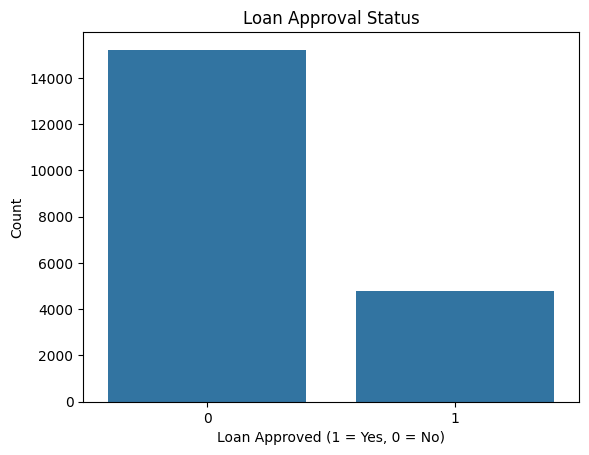

In [ ]:
sns.countplot(data=df, x='LoanApproved')
plt.title("Loan Approval Status")
plt.xlabel("Loan Approved (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

In [ ]:
summary = df.groupby('LoanApproved')['AnnualIncome'].describe()
print(summary)

                count           mean           std      min       25%  \
LoanApproved                                                            
0             15220.0   45641.460907  24079.007328  15000.0  28028.75   
1              4780.0  102210.551464  50313.413141  15787.0  67380.50   

                  50%       75%       max  
LoanApproved                               
0             40557.5   57559.0  228805.0  
1             91269.5  123959.5  485341.0  


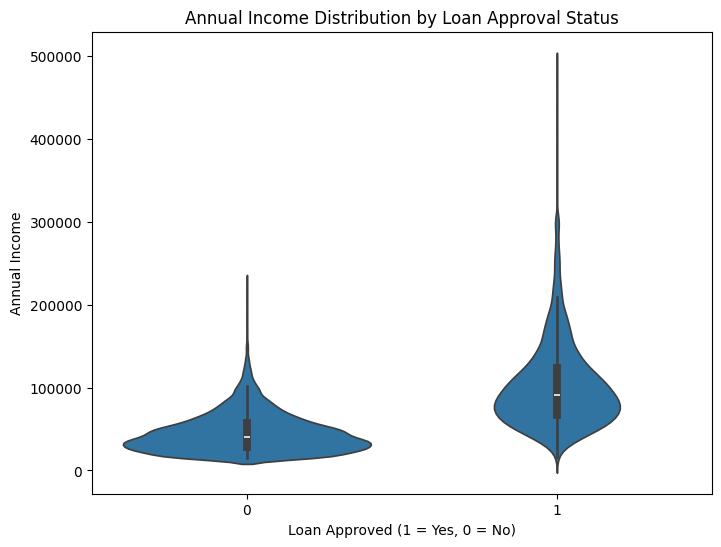

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='LoanApproved', y='AnnualIncome')
plt.title("Annual Income Distribution by Loan Approval Status")
plt.xlabel("Loan Approved (1 = Yes, 0 = No)")
plt.ylabel("Annual Income")
plt.show()


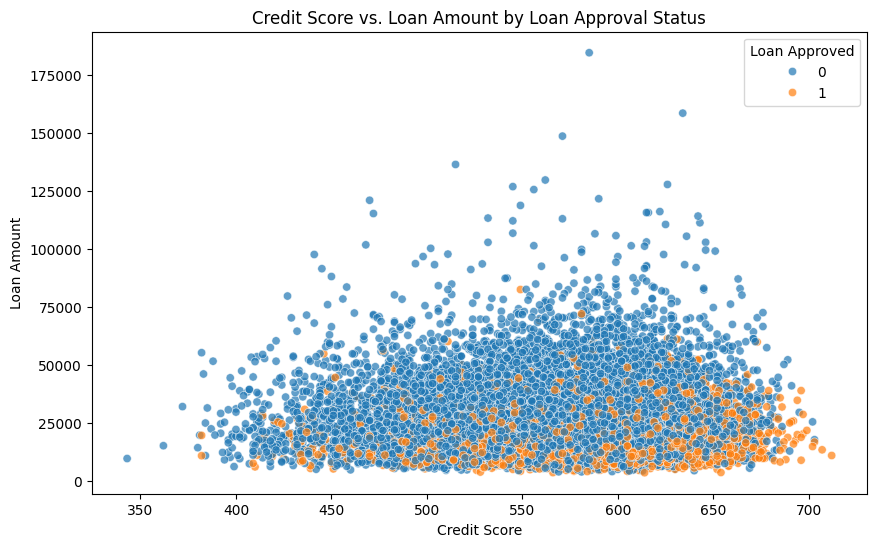

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="CreditScore", y="LoanAmount", hue="LoanApproved", alpha=0.7)
plt.title("Credit Score vs. Loan Amount by Loan Approval Status")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.legend(title="Loan Approved")
plt.show()

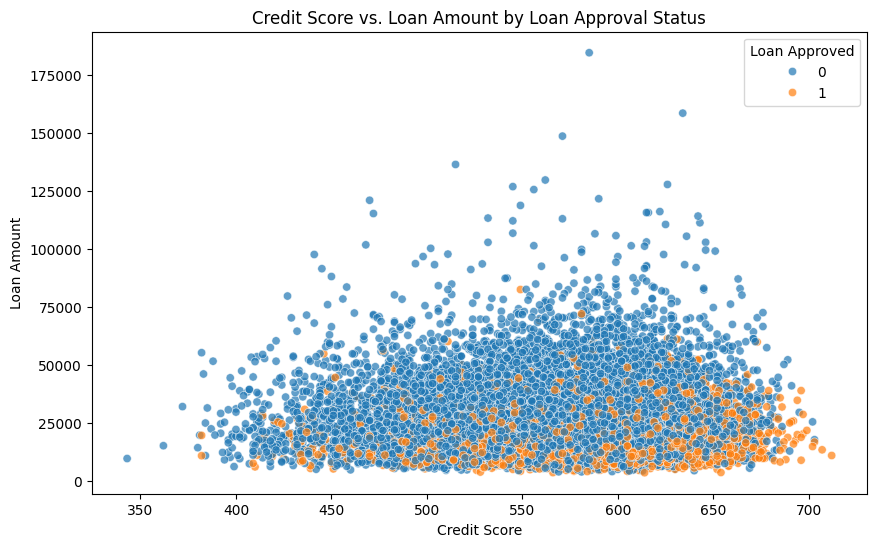

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="CreditScore", y="LoanAmount", hue="LoanApproved", alpha=0.7)
plt.title("Credit Score vs. Loan Amount by Loan Approval Status")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.legend(title="Loan Approved")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=["EmploymentStatus","EducationLevel","MaritalStatus","HomeOwnershipStatus","LoanPurpose"]
for column in columns:
  df[column]=le.fit_transform(df[column])

In [ ]:
df.corr()["LoanApproved"]

,LoanApproved
Age,0.141029
AnnualIncome,0.597900
CreditScore,0.142000
EmploymentStatus,-0.020411
EducationLevel,0.019650
Experience,0.140755
LoanAmount,-0.239496
LoanDuration,-0.094558
MaritalStatus,-0.006828
NumberOfDependents,0.001717


In [ ]:
df.drop(["CheckingAccountBalance","SavingsAccountBalance","DebtToIncomeRatio","MaritalStatus","NumberOfDependents","NumberOfOpenCreditLines","NumberOfCreditInquiries","LoanPurpose","UtilityBillsPaymentHistory","JobTenure","EmploymentStatus","EducationLevel","HomeOwnershipStatus","CreditCardUtilizationRate","TotalLiabilities","LoanDuration","MonthlyDebtPayments","BankruptcyHistory","PreviousLoanDefaults","PaymentHistory"],axis=1,inplace=True)

In [ ]:
df

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LengthOfCreditHistory,TotalAssets,MonthlyIncome,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,22,13152,9,146111,3329.000000,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,15,26045,9,53204,3309.083333,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,26,17627,22,25176,3393.666667,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,34,37898,10,104822,5757.000000,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,17,9184,27,244305,8605.333333,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,19,24521,7,80969,2515.000000,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,56,49246,567,33,25818,28,69571,4103.833333,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,44,48958,645,20,37033,8,108316,4079.833333,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,60,41025,560,36,14760,13,22085,3418.750000,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


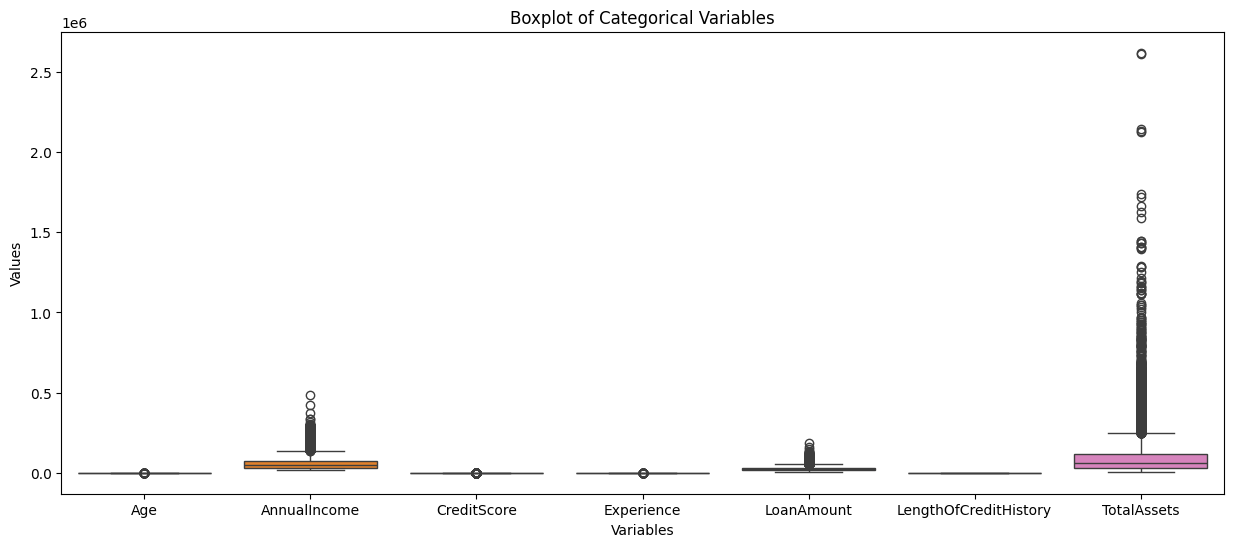

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[["Age","AnnualIncome","CreditScore","Experience","LoanAmount","LengthOfCreditHistory","TotalAssets"]])

plt.title("Boxplot of Categorical Variables")
plt.xlabel("Variables")
plt.ylabel("Values")

plt.show()

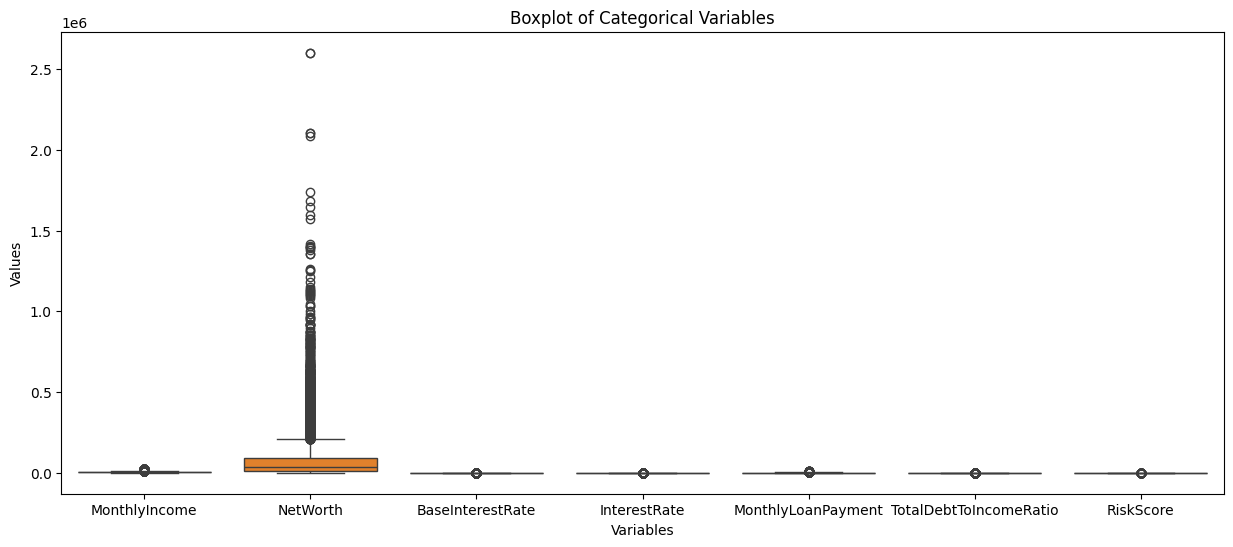

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[["MonthlyIncome","NetWorth","BaseInterestRate","InterestRate","MonthlyLoanPayment","TotalDebtToIncomeRatio","RiskScore"]])

plt.title("Boxplot of Categorical Variables")
plt.xlabel("Variables")
plt.ylabel("Values")

plt.show()

In [ ]:
features_with_outliers=["AnnualIncome","LoanAmount","TotalAssets",	"NetWorth"]

In [ ]:
for i in features_with_outliers:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - IQR * 1.5
    upper_limit = q3 + IQR * 1.5

    # Replace outliers with the lower and upper limit
    df.loc[df[i] < lower_limit, i] = lower_limit
    df.loc[df[i] > upper_limit, i] = upper_limit

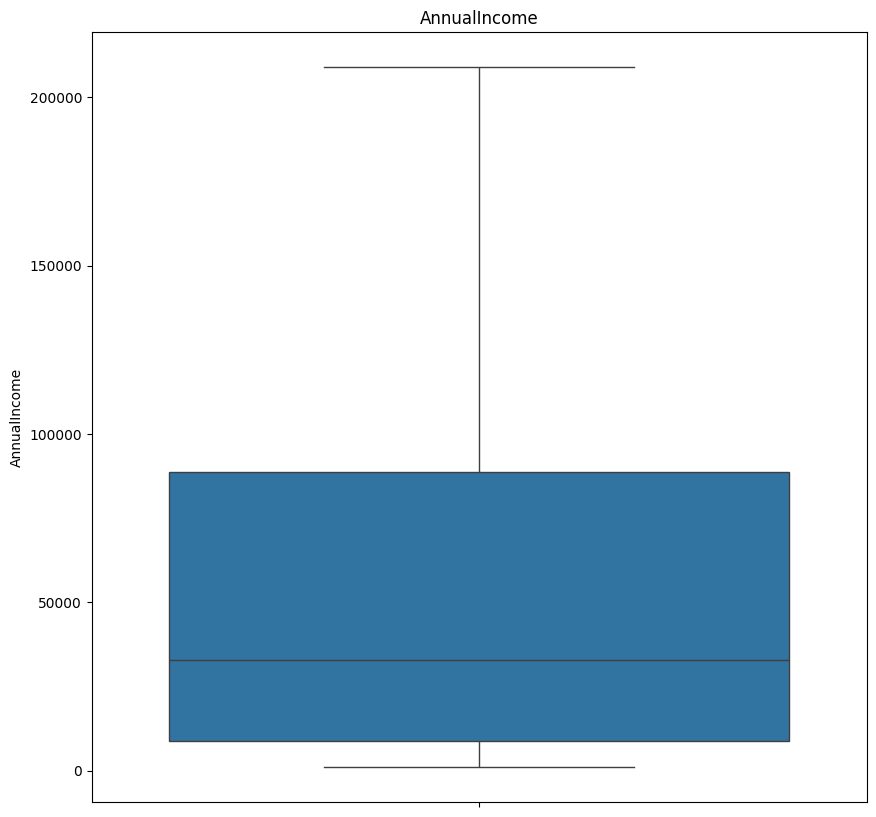

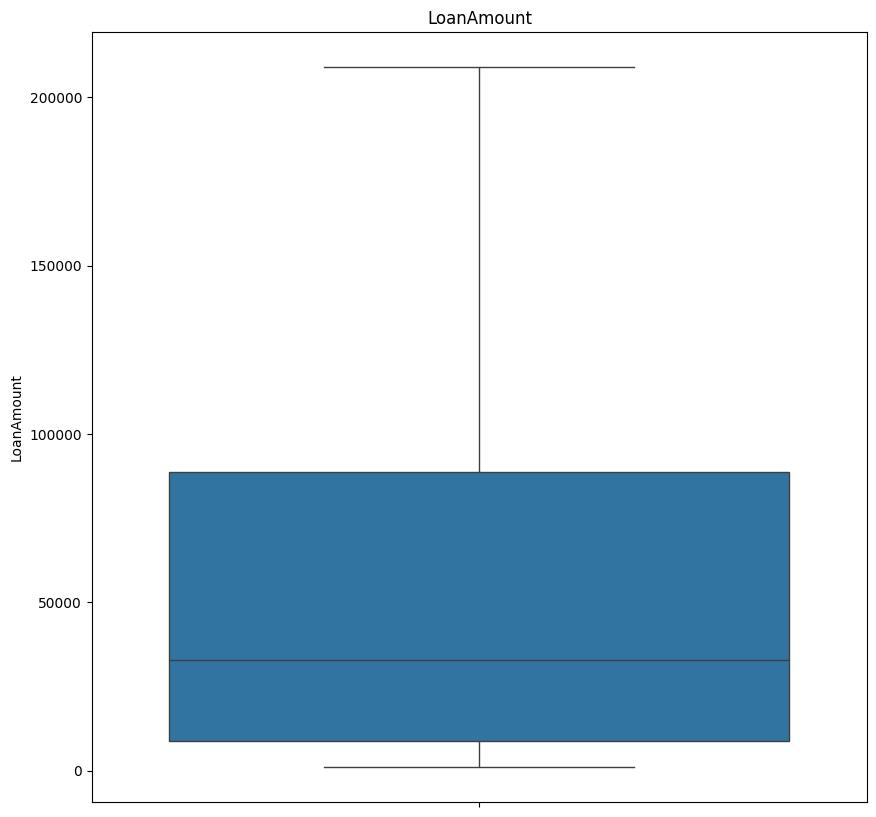

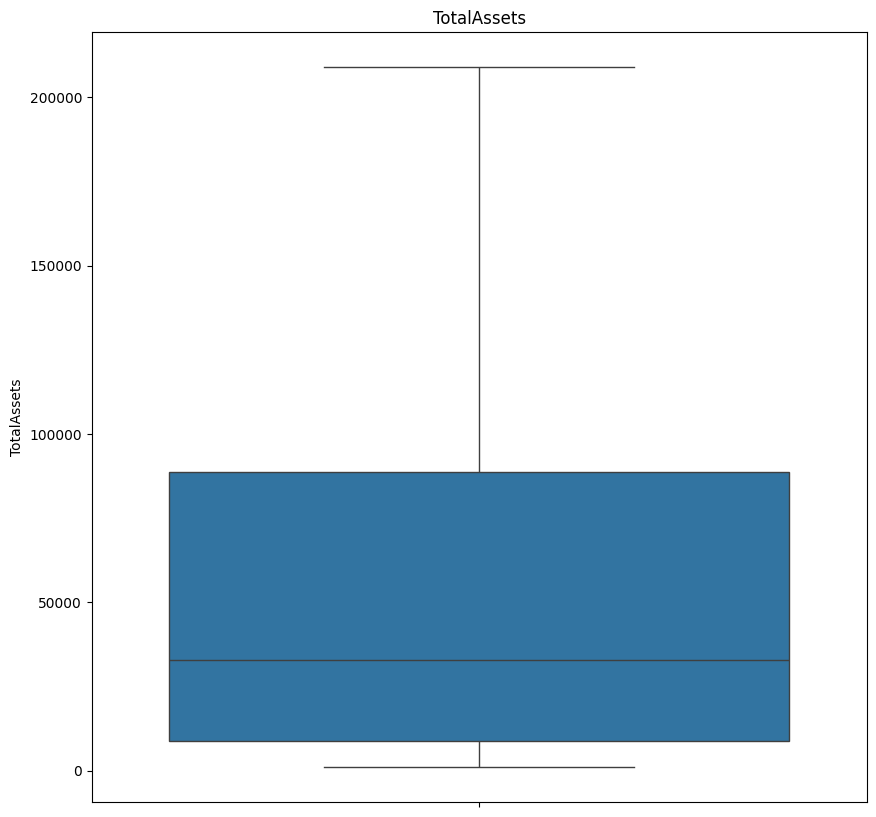

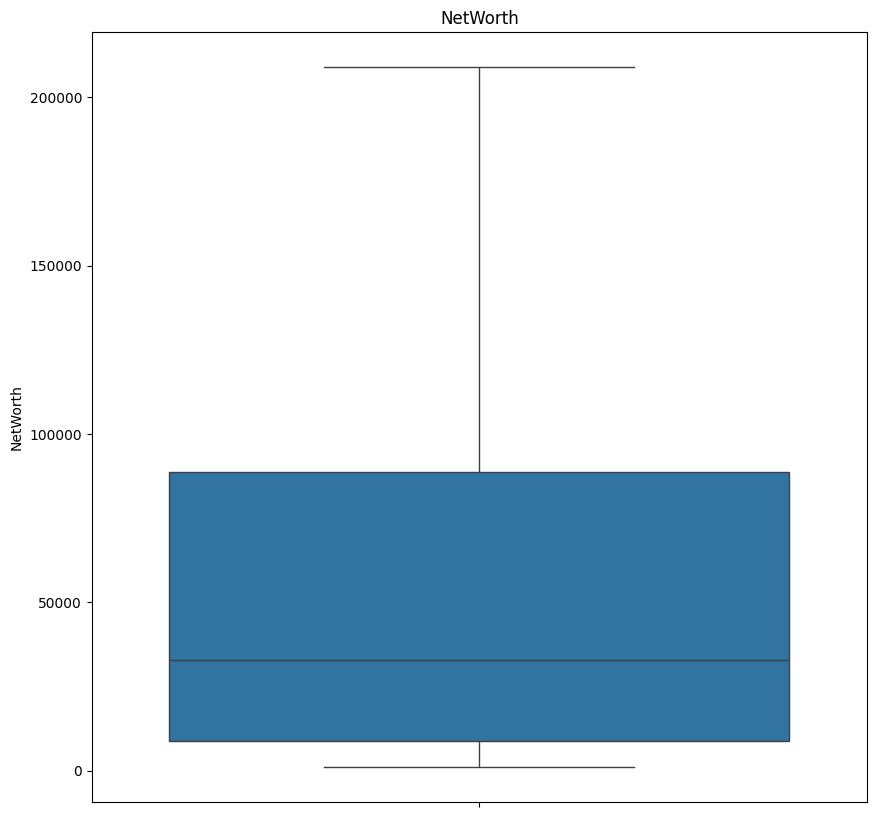

In [ ]:
for j in features_with_outliers:
  plt.figure(figsize=(10,10))
  sns.boxplot(df[i])
  plt.title(j)
  plt.ylabel(j)
  plt.show()

In [ ]:
X=df.drop('LoanApproved',axis=1)
X


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LengthOfCreditHistory,TotalAssets,MonthlyIncome,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,45,39948,617,22,13152,9,146111.0,3329.000000,126928.000,0.199652,0.227590,419.805992,0.181077,49.0
1,38,39709,628,15,26045,9,53204.0,3309.083333,43609.000,0.207045,0.201077,794.054238,0.389852,52.0
2,47,40724,570,26,17627,22,25176.0,3393.666667,5205.000,0.217627,0.212548,666.406688,0.462157,52.0
3,58,69084,545,34,37898,10,104822.0,5757.000000,99452.000,0.300398,0.300911,1047.506980,0.313098,54.0
4,37,103264,594,17,9184,27,244305.0,8605.333333,208961.625,0.197184,0.175990,330.179140,0.070210,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,19,24521,7,80969.0,2515.000000,55327.000,0.216021,0.195574,905.767712,0.627741,55.0
19996,56,49246,567,33,25818,28,69571.0,4103.833333,64002.000,0.227318,0.199168,958.395633,0.334418,54.0
19997,44,48958,645,20,37033,8,108316.0,4079.833333,103663.000,0.229533,0.226766,945.427454,0.357227,45.0
19998,60,41025,560,36,14760,13,22085.0,3418.750000,10600.000,0.249760,0.264873,411.168284,0.408678,59.0


In [ ]:
y=df.LoanApproved
y


,LoanApproved
0,0
1,0
2,0
3,0
4,1
...,...
19995,0
19996,0
19997,0
19998,0


In [ ]:
class_counts=y.value_counts()
max_count=class_counts.max()
min_count=class_counts.min()
skewness_ratio=max_count/min_count
print(f'skewness_ratio:{skewness_ratio}')

skewness_ratio:3.1841004184100417


In [ ]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=42)
X_os,y_os=os.fit_resample(X,y)

In [ ]:
scaler=StandardScaler()
X_os_scaled=scaler.fit_transform(X_os,y_os)

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4654
           1       0.97      0.99      0.98      4478

    accuracy                           0.98      9132
   macro avg       0.98      0.98      0.98      9132
weighted avg       0.98      0.98      0.98      9132

98.41217696014016
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
SVC()
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4654
           1       1.00      0.99      0.99      4478

    accuracy                           0.99      9132
   macr

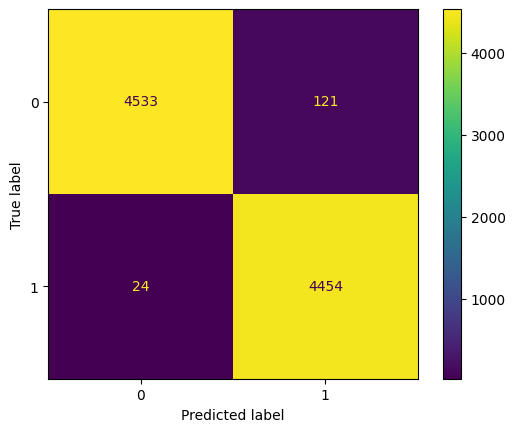

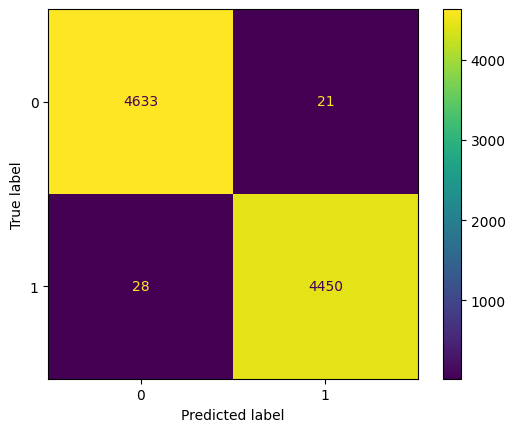

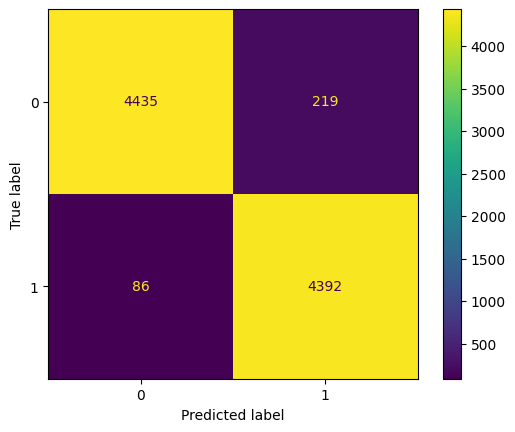

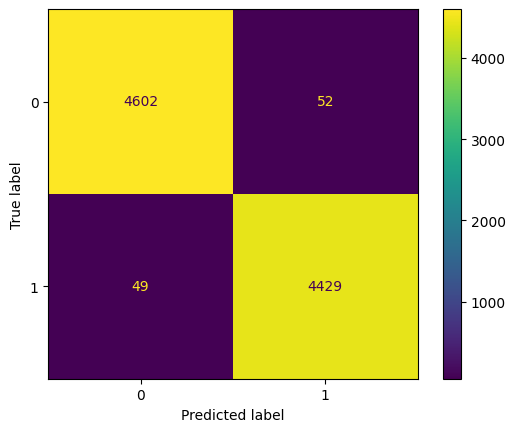

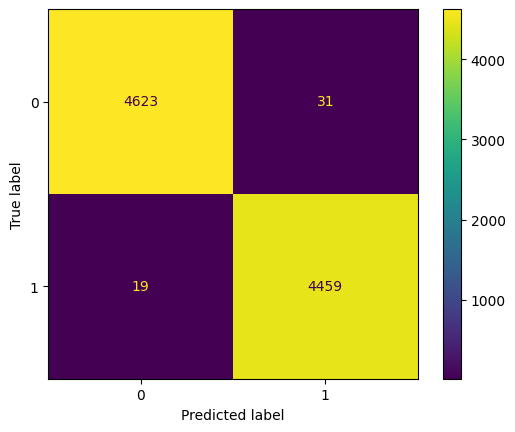

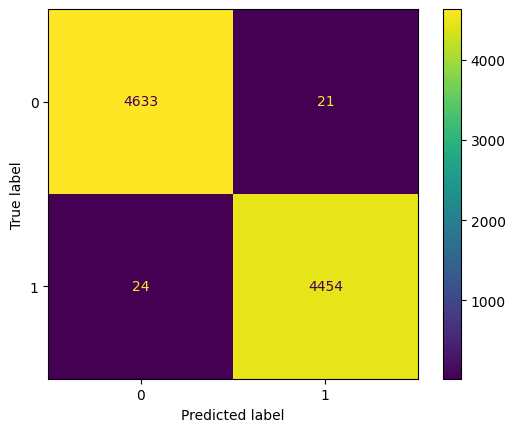

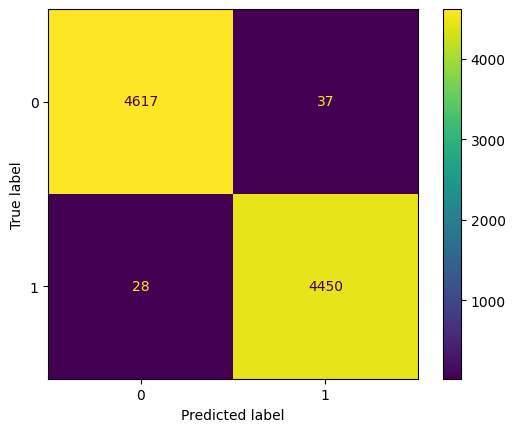

In [ ]:
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os_scaled,y_os,test_size=0.3,random_state=1)
knn_os=KNeighborsClassifier()
sv_os=SVC()
nb_os=GaussianNB()
dt_os=DecisionTreeClassifier(random_state=1)
rf_os=RandomForestClassifier(random_state=1)
gb_os=GradientBoostingClassifier(random_state=1)
ad_os=AdaBoostClassifier(random_state=1)

accuracy_scores_os=[]
model=[knn_os,sv_os,nb_os,dt_os,rf_os,gb_os,ad_os]
for select in model:
  print(select)
  select.fit(X_os_train,y_os_train)
  y_os_pred=select.predict(X_os_test)
  y_os_pred
  print(classification_report(y_os_test,y_os_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_os_pred))
  accuracy_os=accuracy_score(y_os_test,y_os_pred)*100
  print(accuracy_os)
  accuracy_scores_os.append(accuracy_os)
  print("--"*200)


In [ ]:
params={'gamma':['scale','auto'],'kernel':['linear','poly','rbf'],'probability': [True]}
clf=RandomizedSearchCV(sv_os,params,cv=10,scoring='accuracy')
clf.fit(X_os_train,y_os_train)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf'],
                                        'probability': [True]},
                   scoring='accuracy')

In [ ]:
clf.best_params_

{'probability': True, 'kernel': 'rbf', 'gamma': 'scale'}

In [ ]:
y_pred1=clf.predict(X_os_test)
y_pred1
print(classification_report(y_os_test,y_pred1))
accuracy_os1=accuracy_score(y_os_test,y_pred1)*100
print(accuracy_os1)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4654
           1       1.00      0.99      0.99      4478

    accuracy                           0.99      9132
   macro avg       0.99      0.99      0.99      9132
weighted avg       0.99      0.99      0.99      9132

99.46342531756461


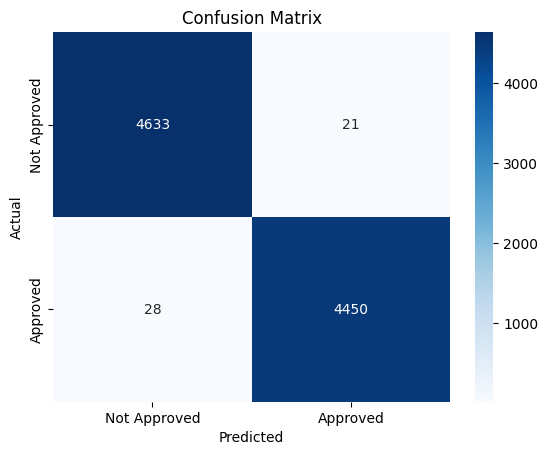

ROC AUC Score: 0.9999


In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_os_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_os_test, clf.best_estimator_.predict_proba(X_os_test)[:, 1]) # Access predict_proba through best_estimator_
print(f'ROC AUC Score: {roc_auc:.4f}')
